# SALES PREDICTION USING PYTHON

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("advertising.csv")
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.shape

(200, 4)

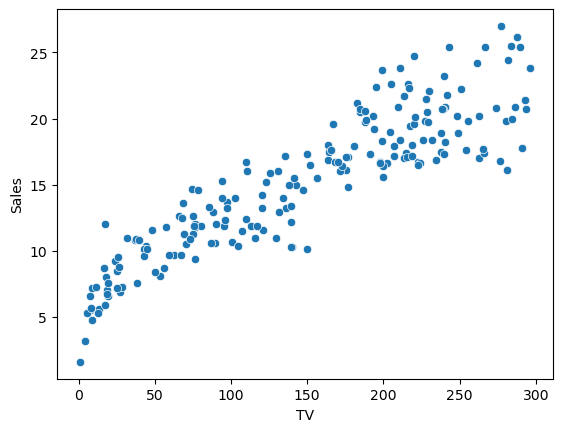

In [8]:
sns.scatterplot(x = df["TV"], y=df["Sales"])
plt.show()

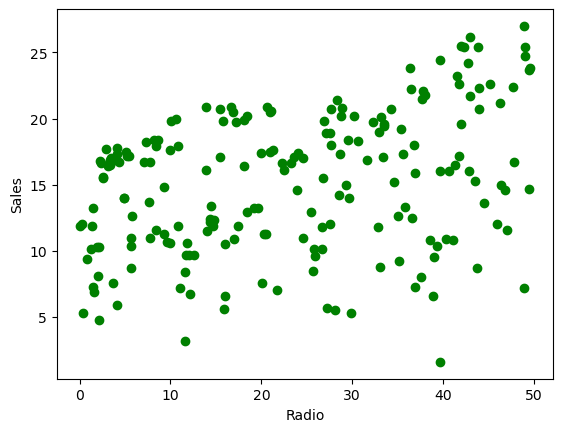

In [9]:
plt.scatter(df["Radio"],df["Sales"], color="g")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

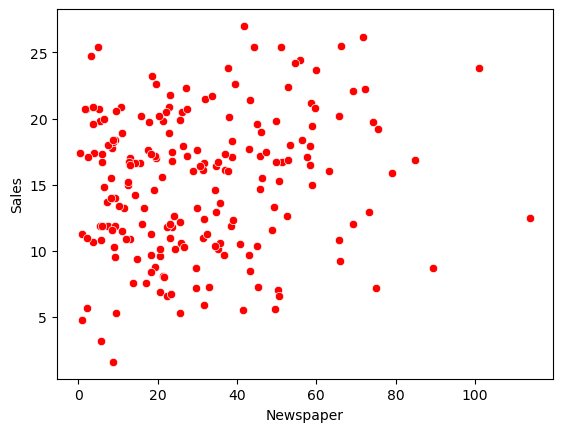

In [10]:
sns.scatterplot(x=df['Newspaper'],y=df['Sales'],color="r")
plt.show()

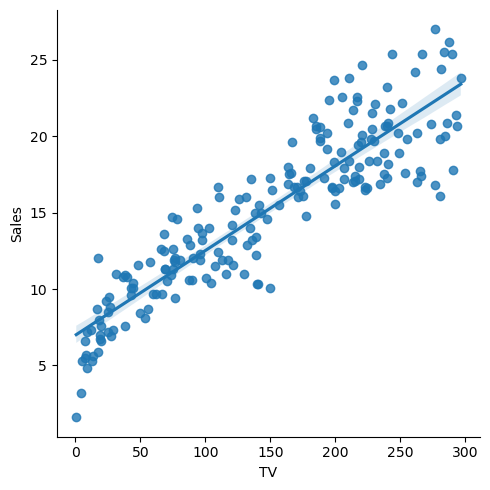

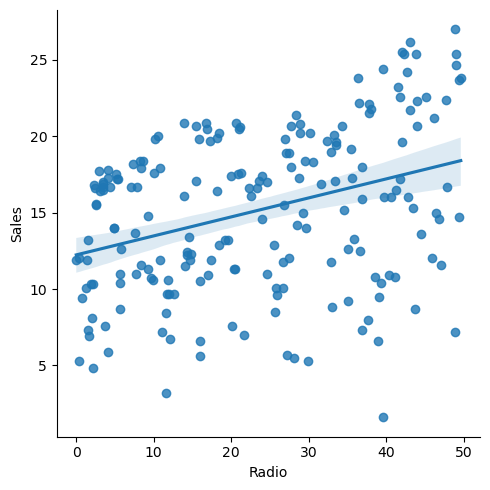

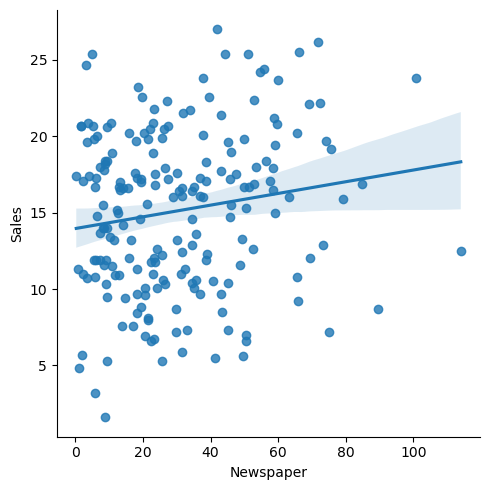

In [11]:
sns.lmplot(x='TV' ,y='Sales',data=df)
sns.lmplot(x='Radio' ,y='Sales',data=df)
sns.lmplot(x='Newspaper' ,y='Sales',data=df)


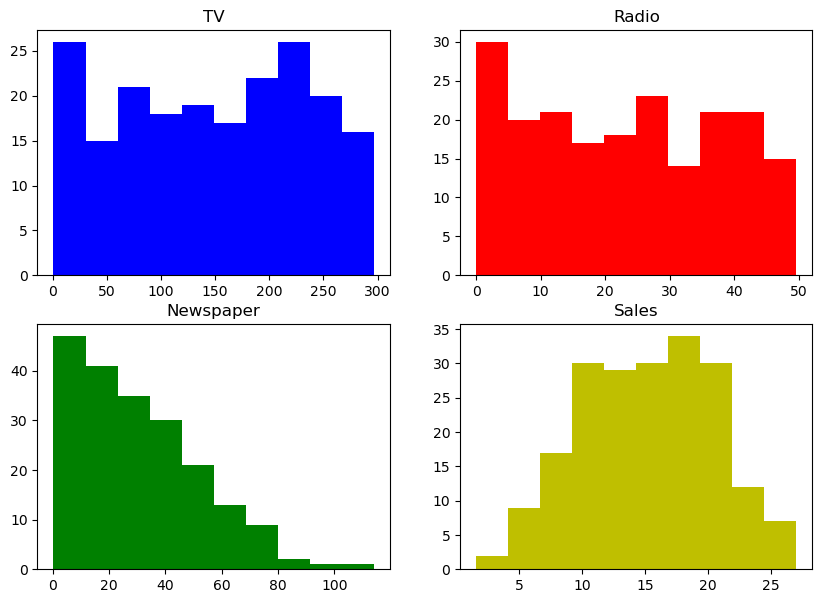

In [12]:
plt.figure(figsize=(10,7))

plt.subplot(221)
plt.hist(df['TV'],color='b')
plt.title('TV')

plt.subplot(222)
plt.hist(df['Radio'],color='r')
plt.title('Radio')

plt.subplot(223)
plt.hist(df['Newspaper'],color='g')
plt.title('Newspaper')

plt.subplot(224)
plt.hist(df['Sales'],color='y')
plt.title('Sales')

plt.show()

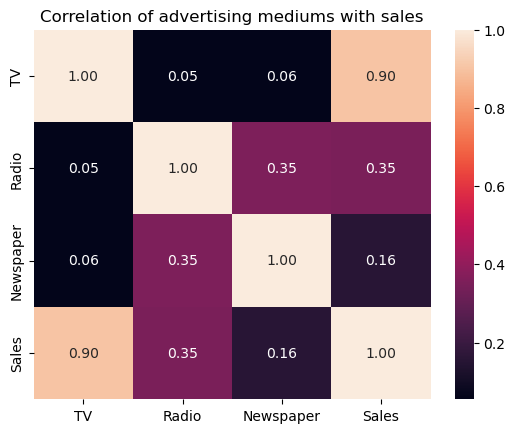

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.title("Correlation of advertising mediums with sales")
plt.show()

In [14]:
x = df[['TV']]
y = df[['Sales']]

In [15]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [16]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)


        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   

In [17]:
ML = LinearRegression()
ML.fit(x_train,y_train)

LinearRegression()

In [18]:
x_train_prediction = ML.predict(x_train)
print(x_train_prediction)

[[ 9.1709017 ]
 [ 8.87695647]
 [14.94093769]
 [18.57170561]
 [18.88742456]
 [12.75267876]
 [ 7.63041096]
 [ 8.08221567]
 [14.0046677 ]
 [12.85610393]
 [13.1391623 ]
 [19.65494821]
 [20.97770175]
 [17.22717836]
 [ 9.59548926]
 [10.55353297]
 [23.10608294]
 [16.55219302]
 [18.18522207]
 [ 7.55964637]
 [21.59825279]
 [17.91849399]
 [19.0561709 ]
 [15.18044861]
 [16.48687185]
 [19.01262345]
 [21.46216703]
 [16.0622843 ]
 [12.62747986]
 [11.31561319]
 [17.22717836]
 [14.47280269]
 [22.06094435]
 [23.296603  ]
 [12.39885579]
 [13.1391623 ]
 [21.06479663]
 [18.27231695]
 [20.23195181]
 [17.70620021]
 [17.56467103]
 [12.04503283]
 [ 9.50295094]
 [ 9.24166629]
 [ 7.87536532]
 [20.18840437]
 [ 8.09854596]
 [18.63158334]
 [ 8.55579409]
 [16.79714737]
 [18.424733  ]
 [10.76038331]
 [15.31109094]
 [14.20607461]
 [12.28998719]
 [22.22424726]
 [22.23513412]
 [ 7.58686352]
 [20.81984227]
 [16.72638278]
 [ 7.7991573 ]
 [11.27206575]
 [18.03824945]
 [19.6876088 ]
 [13.00851997]
 [19.4535413 ]
 [16.05139

In [19]:
print(y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [20]:
print(ML.coef_)
print(ML.intercept_)

[[0.0544343]]
[7.16227597]


In [21]:
x_test_prediction = ML.predict(x_test)
print(x_test_prediction)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [22]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


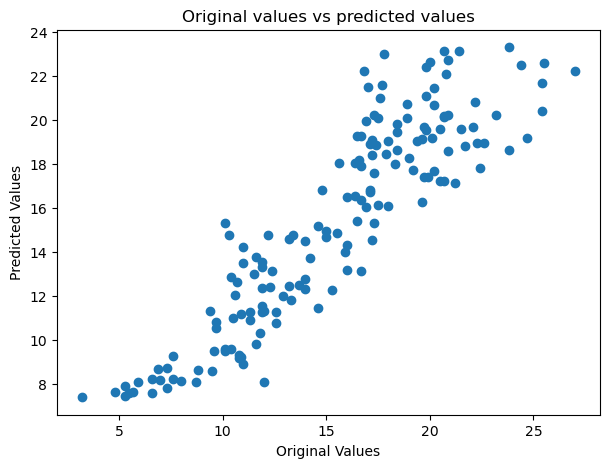

In [23]:
plt.figure(figsize=[7,5])
plt.scatter(y_train,x_train_prediction)
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Original values vs predicted values")
plt.show()

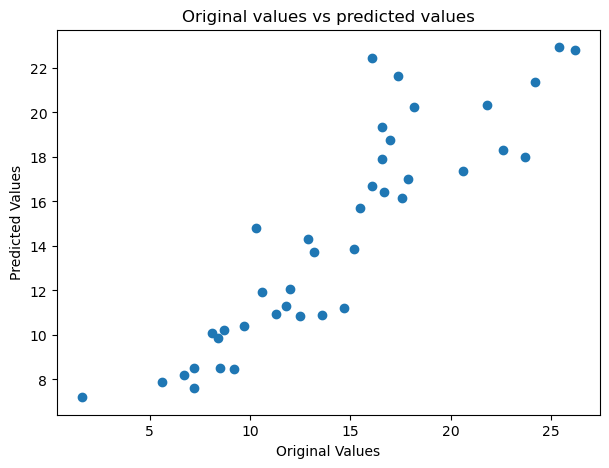

In [24]:
plt.figure(figsize=[7,5])
plt.scatter(y_test, x_test_prediction)
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Original values vs predicted values")
plt.show()